In [1]:
import pandas as pd
import numpy as np


In [2]:
from statsmodels.formula.api import ols
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()



Saving WordDifficulty.csv to WordDifficulty.csv


The relationship between word difficulty and word frequency

Text Simplification is the task of reducing the complexity of the vocabulary and sentence structure of text while retaining its original meaning, with the goal of improving readability and understanding. Simplification has a variety of important societal applications, for example increasing accessibility for those with cognitive disabilities such as aphasia, dyslexia, and autism, or for non-native speakers and children with reading difficulties.

Most text-simplification systems require an indicator of the complexity of the words. The prevalent approaches to word difficulty prediction are based on manual feature engineering. Using deep learning based models are largely left unexplored due to their comparatively poor performance. We have explored the use of one of such in predicting the difficulty of words. We have treated the problem as a binary classification problem. We have trained traditional machine learning models and evaluated their performance on the task. Removing dependency on frequency of previously acquired words for measuring difficulty was one of our primary aims. Then we analyzed a convolutional neural network based prediction model which operates at the character level and evaluate its efficiency compared to others.

This dataset contains 40481 data instances. The various column headers are as follows:

* Word
* Length
* Freq_HAL
* LogFreqHAL
* IMeanRT
* I_Zscore
* I_SD
* Obs
* I_Mean_Accuracy

I_Zscore determines the difficulty of the word. This value fluctuates between 0 & 1 for a word with 0 being SIMPLE & 1 being DIFFICULT
Content
The data is in CSV format. Please check the https://github.com/garain/Word-Difficulty-Prediction/blob/master/WORD_DIFFICULTY.pdf for obtaining the difficulty label from the I_Z score.

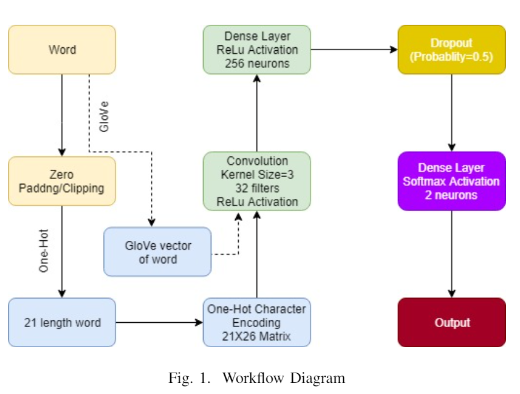

Hyperspace analogue to language (HAL) also known as semantic memory, it was developed by Kevin Lund and Curt Burgress from the University of California, Riverside, California in 1996. The basic premise the work relies on is that words with similar meaning repeatedly occur closely (also known as co-occurrence). As an example in a large corpus of text one could expect to see the words mouse, dog and cat appear often close to each other. The same might be true for Japan, Malaysia and Singapore.

Limitations
* Only includes words of 21 characters or less


Hypothesis: 

The null hypothesis is that there is no statistically significant relationship between the I Zscore and the log Freq Hall.

The alternative is that there is a statistically significant relationship between the I Zscore and the log Freq Hall.

In [6]:
wd = pd.read_csv('WordDifficulty.csv', nrows=1000)
wd.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


DATA WRANGLING
I droped all null values and limited the data set to 1000 rows for better legibility

In [7]:
wd.isnull().sum().sum()

4

In [8]:
wd.dropna(inplace= True)

In [9]:
wd.isnull().sum().sum()

0

In [10]:
wd.head()

,Word,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
0,a,1,10610626,16.18,798.92,-0.01,333.85,24.0,0.73
1,aah,3,222,5.40,816.43,0.21,186.03,21.0,0.62
2,Aaron,5,10806,9.29,736.06,-0.11,289.01,32.0,0.97
3,aback,5,387,5.96,796.27,0.11,171.61,15.0,0.45
4,abacus,6,513,6.24,964.40,0.65,489.00,15.0,0.47


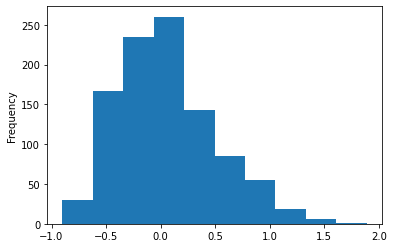

In [11]:
wd['I_Zscore'].plot(kind= 'hist')

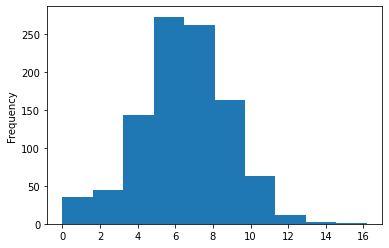

In [12]:
wd['Log_Freq_HAL'].plot(kind= 'hist')

In [13]:
wd.describe()

,Length,Freq_HAL,Log_Freq_HAL,I_Mean_RT,I_Zscore,I_SD,Obs,I_Mean_Accuracy
count,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,8.262262,1.954937e+04,6.447888,798.404595,0.050080,285.421131,27.340340,0.831381
std,2.494741,3.429612e+05,2.341644,132.318462,0.445168,95.440344,7.432278,0.213336
min,1.000000,0.000000e+00,0.000000,530.910000,-0.900000,91.220000,2.000000,0.060000
25%,6.500000,1.515000e+02,5.020000,701.200000,-0.275000,214.730000,25.000000,0.770000
50%,8.000000,6.600000e+02,6.490000,784.260000,0.010000,273.750000,30.000000,0.930000
75%,10.000000,3.018500e+03,8.010000,871.625000,0.300000,335.445000,33.000000,0.970000
max,16.000000,1.061063e+07,16.180000,1504.000000,1.890000,840.750000,36.000000,1.000000


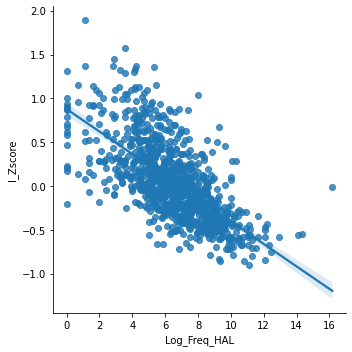

In [14]:
sns.lmplot(x= 'Log_Freq_HAL',y= 'I_Zscore', data= wd, ci= 95, );

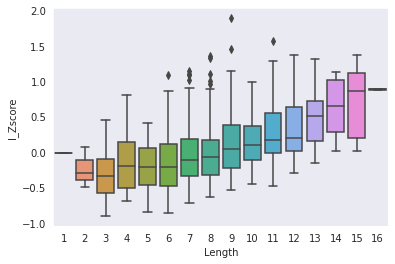

In [ ]:
sns.boxplot(x='Length',y='I_Zscore',data=wd)

In [15]:
model = ols('I_Zscore ~ Log_Freq_HAL', data= wd).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               I_Zscore   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     832.0
Date:                Tue, 21 Sep 2021   Prob (F-statistic):          1.62e-133
Time:                        21:46:53   Log-Likelihood:                -305.44
No. Observations:                 999   AIC:                             614.9
Df Residuals:                     997   BIC:                             624.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8768      0.030     28.756   

Conclusion:

With a p-vale of essentially 0 which is less then the theshold of 0.05, we can reject the null hypothesis and accept the alternative which is that there is a statistically significant relationship between the I Zscore and the Log frequency HAL.

Since this database uses machine learning models that is something that I will have to investigate further on.

$\hat{Y} = 0.88 - 0.13 X$

In [16]:
#Specify the value of x we'd like to predict
x = 9000

#Take the natural log of x
ln_x = np.log(x)

#Extract the slope and intercept values from the model paramters
intercept = model.params[0]
slope = model.params[1]
#Use the model coefficients and plug the new value of x into the regression equation
predict = intercept + (slope*ln_x)
print('ln 9000 = ', ln_x)
print('Predicted I Zscore = ', predict)

ln 9000 =  9.104979856318357
Predicted I Zscore =  -0.2906141325810916


In [ ]:
wd_hardest = ' '.join(wd['Word'][wd.sort_values('I_Zscore',ascending=False).index][0:10].values)
wd_easiest = ' '.join(wd['Word'][wd.sort_values('I_Zscore',ascending=True).index][0:10].values)
print('The hardest words are: ',wd_hardest,'\n')
print('The easiest words are: ',wd_easiest,'\n')

The hardest words are:  algaecide aftereffect abutments alliterative acclimatized abstractionists aeration Alleluia agglutinating academicianship 

The easiest words are:  age accept adults above actor action adult Alaska again alarmed 



In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

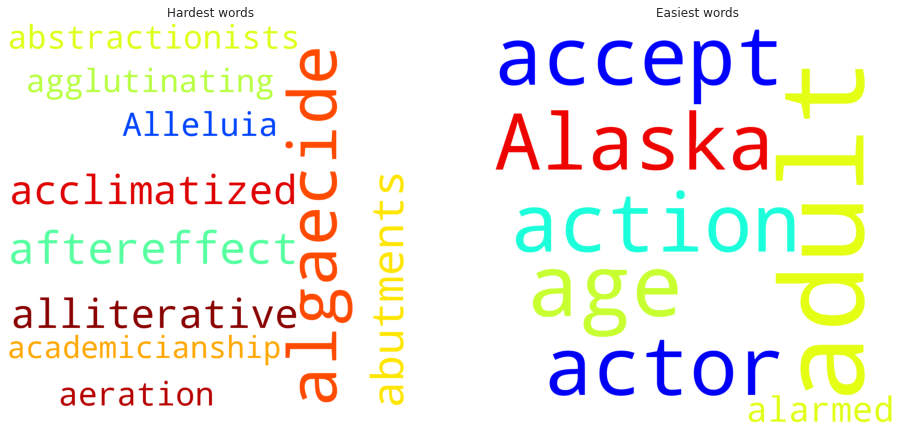

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,9))

wordcloud = WordCloud(
        background_color="white", 
        min_font_size=4,
        colormap='jet',
        height=1000,
        width=1000
        )
    
wordcloud.generate(wd_hardest)

ax1.imshow(wordcloud)
ax1.axis("off")
ax1.set_title('Hardest words')

wordcloud.generate(wd_easiest)

ax2.imshow(wordcloud)
ax2.axis("off")
ax2.set_title('Easiest words')

plt.show()


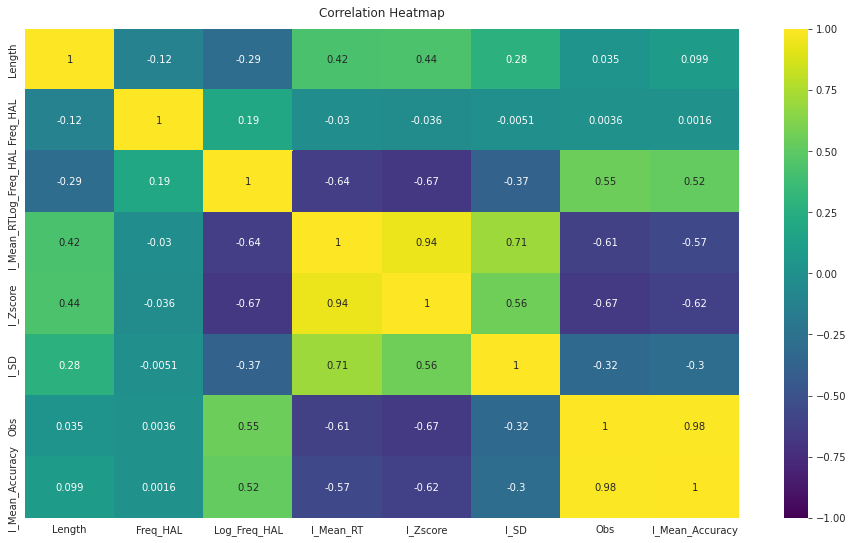

In [ ]:
sns.set_style(style='dark')
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(wd.corr(), vmin=-1,vmax=1, annot=True,cmap='viridis',)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

Positive strong correlation between I_Zscore and:

* I_Mean_RT
* I_SD
* Length

Negative strong correlation between I_Zscore and:

* Log_Freq_HAL
* Obs
* I_Mean_Accuracy
Non-correlation between I_Zscore and:

* Freq_HAL